In [70]:
import numpy as np
import math as mp
import pandas as pd

In [71]:
sigma = 5
beta = 1 /( 1.0 +0.01)
beta1 =1/( (1.0 +0.01* np.exp(30/(36.5*0.9)))) 
W = 1

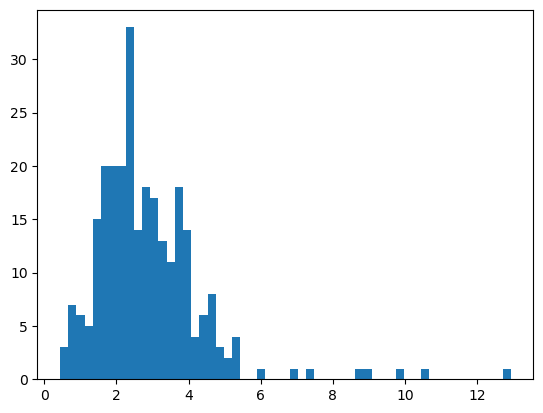

In [72]:
data=pd.read_csv('APP_data_usa_goods.csv', index_col=0, parse_dates=True, infer_datetime_format=True)
data_tau=(data['invtCogsRatio']* 36.5/(30*0.1))
import matplotlib.pyplot as plt
plt.hist(data_tau,bins = 55)
plt.show()

In [73]:
tau_diff = np.zeros(( 1000,1))
i = 0
for c in np.linspace(0, 0.99, 1000): 
    N = -(data_tau) - 1/np.log(beta*c) 
    tau1= -1/np.log(beta*c) - N
    tau1[tau1<0] = 0     
    tau2= -1/np.log(beta1*c) - N
    tau2[tau2<0] = 0    
    tau_diff[i] = np.mean(np.abs(tau1-tau2))
    i = i+1

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_67641/1678760125.py:4: RuntimeWarning: divide by zero encountered in log
  N = -(data_tau) - 1/np.log(beta*c)
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_67641/1678760125.py:5: RuntimeWarning: divide by zero encountered in log
  tau1= -1/np.log(beta*c) - N
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_67641/1678760125.py:7: RuntimeWarning: divide by zero encountered in log
  tau2= -1/np.log(beta1*c) - N


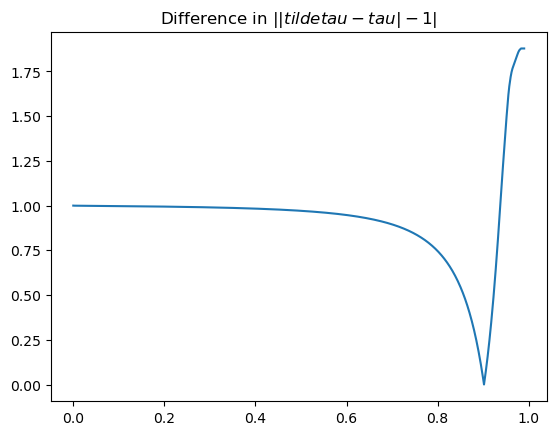

In [74]:
plt.plot(np.linspace(0, 0.99, 1000),np.abs(tau_diff-1))
plt.title('Difference in $||tildetau - tau| -1|$')

plt.show()

In [75]:
min_val = np.min(np.abs(tau_diff-1))
argmins = np.where(np.abs(tau_diff-1) == min_val)[0]

In [76]:
c_list = np.linspace(0, 0.99, 1000)
c=c_list[argmins]


In [77]:
N=-data_tau - 1/np.log(beta*c) 
tau= -1/np.log(beta*c) - N
tau[tau<0] = 0  
tau_floor = np.floor(tau)
tau_ceil = np.ceil(tau)
tprod_ceil=  (beta*c)**tau_ceil * (tau_ceil + N)
tprod_floor=  (beta*c)**tau_floor * (tau_floor + N)

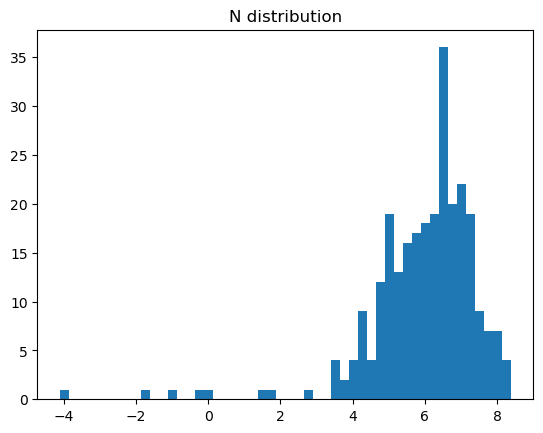

In [78]:
plt.hist(N, bins=50)
plt.title('N distribution')
plt.show()

In [79]:
beta = 1 / (1+0.01) *c
N=-data_tau - 1/np.log(beta) 

In [80]:

tau1= -1/np.log(beta) - N
tau1[tau1<0] = 0  
tau1_ceil = np.ceil(tau1)
tau1_floor = np.floor(tau1)
tprod1_ceil=  beta**tau1_ceil * (tau1_ceil + N)
tprod1_floor=  beta**tau1_floor * (tau1_floor + N)

In [81]:
tau1[(tprod1_ceil-tprod1_floor)>0] = tau1_ceil[(tprod1_ceil-tprod1_floor)>0]
tau1[(tprod1_ceil-tprod1_floor)<0] = tau1_floor[(tprod1_ceil-tprod1_floor)<0]
tau1[tau1<0] = 0  
tprod1 = beta**tau1 * (tau1 + N)

In [82]:
N1 =  N*0.99
tau2= -1/np.log(beta) - N1
tau2[tau2<0] = 0  
tau2_ceil = np.ceil(tau2)
tau2_floor = np.floor(tau2)
tprod2_ceil=  beta**tau2_ceil * (tau2_ceil + N1)
tprod2_floor=  beta**tau2_floor * (tau2_floor + N1)

In [83]:
tau2[(tprod2_ceil-tprod2_floor)>0] = tau2_ceil[(tprod2_ceil-tprod2_floor)>0]
tau2[(tprod2_ceil-tprod2_floor)<0] = tau2_floor[(tprod2_ceil-tprod2_floor)<0]
tau2[tau2<0] = 0
t_prod2 = beta**tau2 * (tau2 + N1)**1

In [84]:
tau1 = tau1.sort_values()
tau2 = tau2.sort_values()

In [85]:
diff = tau1-tau2

In [86]:
index_diff=tau2[diff !=0].index

In [87]:
tau2_temp = tau2[tau2 == 3]
matches = tau2_temp.index.isin(index_diff)

In [88]:
P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma))
P = np.zeros((int(np.max(tau2))+2, 1))
P[0,0] = P0 
P[-1,0] = P0
for j in range(0, int(np.max(tau2))): 
    tau1_temp = tau1[tau1 != j]
    tau2_temp = tau2[tau2 == j]
    N_temp1 = N[tau1 != j]
    N_temp2 = N1[tau2 == j]        
    N_temp = np.concatenate([N_temp1, N_temp2])
    tau_temp = np.concatenate([tau1_temp,tau2_temp])
    matches = tau2_temp.index.isin(index_diff)

    if matches.any():
        print(tau2_temp[matches])
        tau2_temp=tau2_temp[~matches]
        N_temp2 = N_temp2[~matches]
        N_temp = np.concatenate([N_temp1, N_temp2])
        tau_temp = np.concatenate([tau1_temp,tau2_temp])
    tprod_temp = beta**tau_temp * (tau_temp + N_temp)
    P[j+1,0] = (np.sum(1/(tprod_temp)**(1-sigma)))**(1/(1-sigma))

naics6
221310    1.0
Name: invtCogsRatio, dtype: float64
naics6
327993    2.0
323117    2.0
327320    2.0
336415    2.0
327420    2.0
325613    2.0
Name: invtCogsRatio, dtype: float64
naics6
325520    3.0
325211    3.0
332420    3.0
337215    3.0
334112    3.0
325510    3.0
322212    3.0
Name: invtCogsRatio, dtype: float64
naics6
316210    4.0
Name: invtCogsRatio, dtype: float64
naics6
339114    5.0
Name: invtCogsRatio, dtype: float64


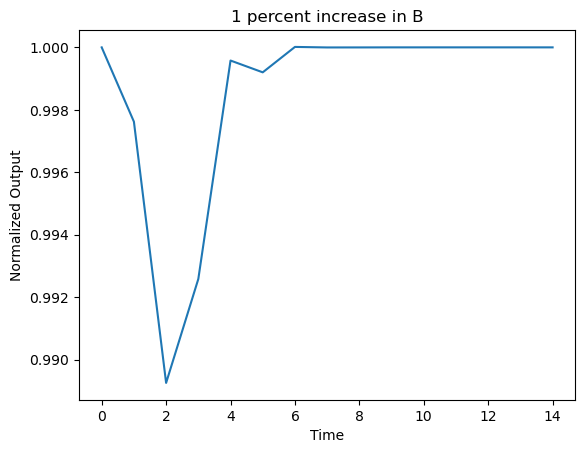

In [89]:
import matplotlib.pyplot as plt

plt.plot( (1/ P)* P[0])
plt.title('1 percent increase in B')
plt.xlabel('Time')
plt.ylabel('Normalized Output') 
plt.show()

In [90]:

def generate_pattern_array_with_extra_rows(tau):
    # 1) Create the original n×n pattern
    n = len(tau)+ int(np.min(tau))
    m = int(np.max(tau)) + int(np.min(tau))

    mx = int(max(tau))
    missing_count = len(set(range(int(max(tau) )+ 1)) - set(tau))
    print(missing_count)


    A = np.ones((m+2, n+missing_count), dtype=float)
    count = 0
    for i in range(1, m+2):
        for j in range(len(tau[tau == i-1])):
            A[i, n- i-j - count] = 0.99  # 0.9 shifts diagonally from right to left as we go down
        if len(tau[tau == i-1]) > 1:
            count += len(tau[tau == i-1])-1
    # 2) Create the two extra rows:
    #    (a) one row with 0.9 at the leftmost column,
    #    (b) one row of all ones.

    row_all_ones = np.ones(n+missing_count, dtype=float)
    A_extended = np.vstack([A,row_all_ones])
    A_extended = A_extended[:,0:n - int(np.min(tau))]

    return A_extended

2


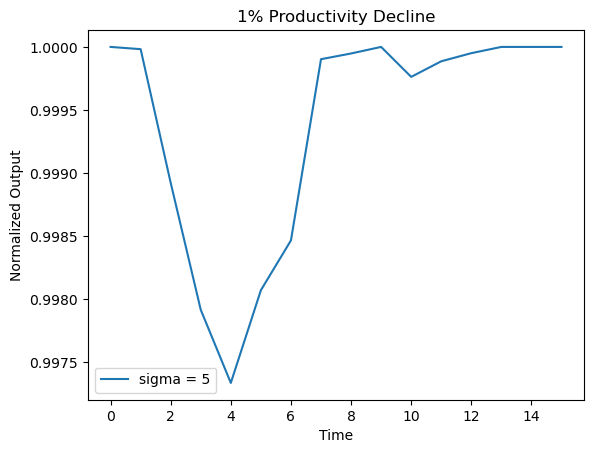

In [91]:
import matplotlib.pyplot as plt

tprod1 = (beta*c)**tau1 * (tau1 + N)
tau1 = tau1[::-1]
tprod1=  np.array((beta*c)**tau1 * (tau1 + N) )  
A= generate_pattern_array_with_extra_rows(tau1)
P0 = (np.sum(1/(A*tprod1)**(1-sigma),axis =1))**(1/(1-sigma))
plt.plot( (1/P0)*P0[0], label='sigma = {}'.format(sigma))
plt.title('1% Productivity Decline')
plt.xlabel('Time')
plt.ylabel('Normalized Output')
plt.legend()
plt.show()

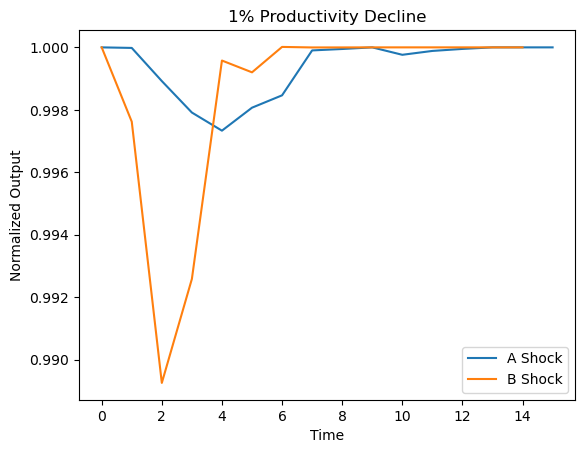

In [ ]:
P0 = (np.sum(1/(A*tprod1)**(1-sigma),axis =1))**(1/(1-sigma))
plt.plot( (1/P0)*P0[0], label='A Shock')
plt.plot( (1/P)*P[0], label = 'B Shock')

plt.title('1% Productivity Decline')
plt.xlabel('Time')
plt.ylabel('Normalized Output')
plt.legend()
plt.show()